### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - \$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \$12500, \$12500 - \$24999, \$25000 - \$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a restaurant costing $20 to 50 per: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from prettytable import PrettyTable
from scipy.stats import ttest_ind

import os

In [ ]:
from google.colab import drive

drive_root = '/content/drive'
if not os.path.exists(drive_root):
  drive.mount(drive_root)

colab_home = f'{drive_root}/MyDrive/Colab'
ws = f'{colab_home}/workspace_ucb_ml'

os.chdir(ws)

Mounted at /content/drive


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

All missing values are confined to categorical variables, so we can simply replace them with a placeholder value.

In [ ]:
data.fillna("unspecified", inplace=True)

# verify that invalid values are now filled
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [ ]:
data['Y'].value_counts(normalize=True)[1]

0.5684326710816777

About 55.84% of all coupons have been accepted.

5. Use a bar plot to visualize the `coupon` column.

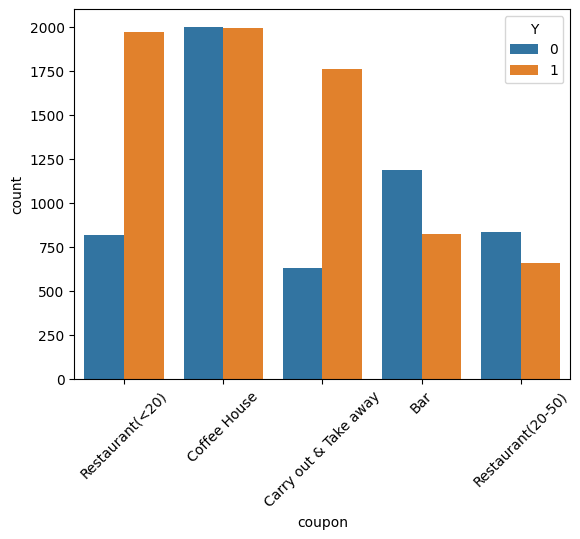

In [ ]:
plt.figure()
sns.countplot(data=data, x='coupon', hue='Y')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

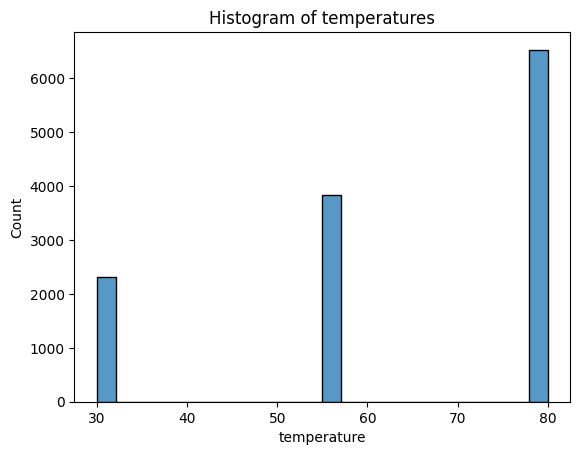

In [ ]:
plt.figure()
sns.histplot(data=data, x='temperature')
plt.title('Histogram of temperatures')
plt.show()

Because there are only three discrete values for temperature, a count plot seems more appropriate.

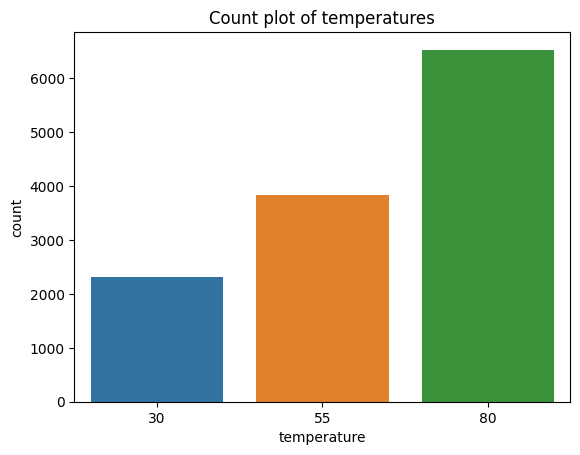

In [ ]:
plt.figure()
sns.countplot(data=data, x='temperature')
plt.title('Count plot of temperatures')
plt.show()

Temperatures are most likely linked to the time of day and the weather, so we explore how they affect the distribution.

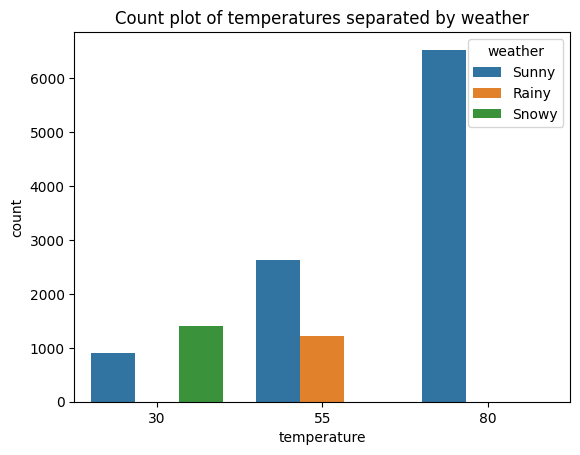

In [ ]:
plt.figure()
sns.countplot(data=data, x='temperature', hue='weather')
plt.title('Count plot of temperatures separated by weather')
plt.show()

It's not a surprise most of the higher temperatures were recorded during "sunny" weather.

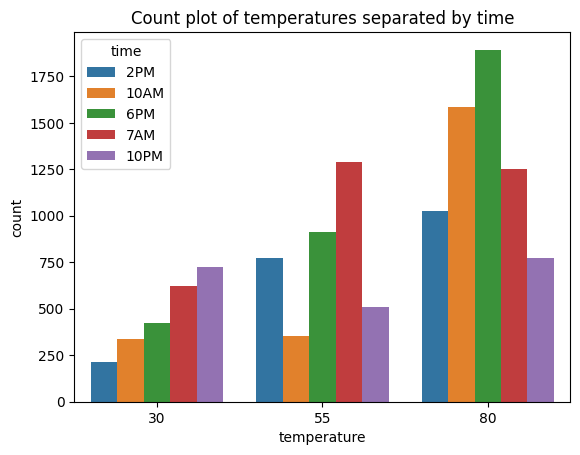

In [ ]:
plt.figure()
sns.countplot(data=data, x='temperature', hue='time')
plt.title('Count plot of temperatures separated by time')
plt.show()

Temperatures are generally higher in the middle of the day. However, there are also low temperatures (a few hundred instances) during midday as well as high temperatures during morning or evening hours. One possible explanation for the variations in temperature is that the coupon provider is generating coupons for businesses around the world.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
# we first look at what types of coupons are available
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [ ]:
df_bar = data[data['coupon'] == 'Bar']

df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,unspecified,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,unspecified,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,unspecified,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [ ]:
df_bar['Y'].value_counts(normalize=True)[1]

0.41001487357461575

About 41% of all bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


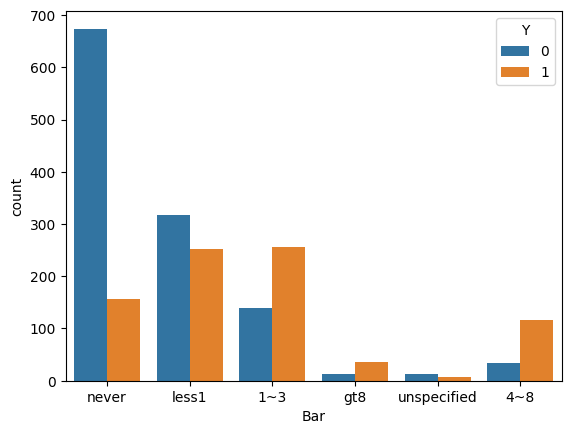

In [ ]:
# we first visualize the data
plt.figure()
sns.countplot(data=df_bar, x='Bar', hue='Y')
plt.show()

In [ ]:
bar_freqs = set(df_bar['Bar'].unique())
bar_freqs.remove('unspecified')

bar_ratios = df_bar.groupby('Bar')[['Y']].value_counts(normalize=True)

bar_ratios_table = PrettyTable()
bar_ratios_table.field_names = ['Bar frequency', 'Acceptance ratio']
for freq in bar_freqs:
  bar_ratios_table.add_row([freq, bar_ratios[freq][1]])

print(bar_ratios_table)

+---------------+---------------------+
| Bar frequency |   Acceptance ratio  |
+---------------+---------------------+
|     less1     |  0.443859649122807  |
|     never     | 0.18795180722891566 |
|      4~8      |         0.78        |
|      1~3      |  0.6473551637279596 |
|      gt8      |  0.7346938775510204 |
+---------------+---------------------+


People who visit bars less than once a month do seem to use less bar coupons, but we perform a hypothesis test to be sure.

In [ ]:
bar_coupons_less1 = df_bar[df_bar['Bar'] == 'less1']['Y']
bar_coupons_1_3 = df_bar[df_bar['Bar'] == '1~3']['Y']

ttest_ind(bar_coupons_less1, bar_coupons_1_3, equal_var=True)

TtestResult(statistic=-6.357976662240881, pvalue=3.1494454277183075e-10, df=965.0)

The *p*-value is well below 0.05 and shows a high level of statistical significance.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
# copy original DataFrame to avoid SettingWithCopyWarning
df_bar_copy = df_bar.copy()

# Create new columns to indicate whether the person "frequently" goes to bars,
# and whether they are over 25 years of age. Although not necessary, this
# improves the readability of the results.
bar_values_gt1 = ['1~3', '4~8', 'gt8']
age_values_gt25 = ['26', '31', '36', '41', '46', '50plus']

df_bar_copy['bar_frequenter'] = df_bar.apply(lambda d: True if d['Bar'] in bar_values_gt1 else False, axis=1)
df_bar_copy['age_over_25'] = df_bar.apply(lambda d: True if d['age'] in age_values_gt25 else False, axis=1)

In [ ]:
df_bar_copy.groupby(['bar_frequenter', 'age_over_25'])['Y'].value_counts(normalize=True)

bar_frequenter  age_over_25  Y
False           False        0    0.606707
                             1    0.393293
                True         0    0.736505
                             1    0.263495
True            False        1    0.670455
                             0    0.329545
                True         1    0.695238
                             0    0.304762
Name: Y, dtype: float64

People who go to a bar more than once a month and are over the age of 25 have a 69.5% acceptance rate. This does not differ significantly from the 67% acceptance rate for people who go to a bar more than once a month and are *under* 25 years old.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
# Friends could be any age, but we assume they are adults for the purpose of
# this question.
adult_passengers = ['Friend(s)', 'Partner']
df_bar_copy['adult_passengers'] = df_bar.apply(lambda d: True if d['passanger'] in adult_passengers else False, axis=1)
df_bar_copy['is_fff'] = df_bar.apply(lambda d: True if d['occupation'] == 'Farming Fishing & Forestry' else False, axis=1)

In [ ]:
df_bar_copy.groupby(['bar_frequenter', 'adult_passengers', 'is_fff'])['Y'].value_counts(normalize=True)

bar_frequenter  adult_passengers  is_fff  Y
False           False             False   0    0.741224
                                          1    0.258776
                                  True    0    0.500000
                                          1    0.500000
                True              False   0    0.626506
                                          1    0.373494
                                  True    0    1.000000
True            False             False   1    0.673317
                                          0    0.326683
                True              False   1    0.717949
                                          0    0.282051
Name: Y, dtype: float64

It appears no one in the "3 F's" industry goes to bars more than once a month and had adult passengers. For other industries, there is a 71.8% collective acceptance rate.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
df_bar_copy['is_widowed'] = df_bar.apply(lambda d: True if d['maritalStatus'] == 'Widowed' else False, axis=1)
df_bar_copy.groupby(['bar_frequenter', 'adult_passengers', 'is_widowed'])['Y'].value_counts(normalize=True)

bar_frequenter  adult_passengers  is_widowed  Y
False           False             False       0    0.741935
                                              1    0.258065
                                  True        0    0.538462
                                              1    0.461538
                True              False       0    0.622549
                                              1    0.377451
                                  True        0    0.875000
                                              1    0.125000
True            False             False       1    0.673317
                                              0    0.326683
                True              False       1    0.717949
                                              0    0.282051
Name: Y, dtype: float64

We find the first group has a 71.8% acceptance rate. There are no widowers who go to bars more than once a month and had adult passengers.

In [ ]:
# age values under 30
age_values_lt30 = ['below21', '26']

df_bar_copy['age_under_30'] = df_bar.apply(lambda d: True if d['age'] in age_values_lt30 else False, axis=1)

df_bar_copy.groupby(['bar_frequenter', 'age_under_30'])['Y'].value_counts(normalize=True)

bar_frequenter  age_under_30  Y
False           False         0    0.711091
                              1    0.288909
                True          0    0.689769
                              1    0.310231
True            False         1    0.659472
                              0    0.340528
                True          1    0.754190
                              0    0.245810
Name: Y, dtype: float64

About 75.4% of twenty-somethings who frequent bars will accept a bar coupon.

In [ ]:
df_under_20 = data[data['coupon'] == 'Restaurant(<20)']

df_under_20.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,unspecified,4~8,1~3,1,0,0,0,1,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,unspecified,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,unspecified,4~8,1~3,1,1,0,0,1,1
10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,unspecified,4~8,1~3,1,0,0,0,1,1
11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,unspecified,4~8,1~3,1,1,0,0,1,1


In [ ]:
# copy original DataFrame to avoid SettingWithCopyWarning
df_under_20_copy = df_under_20.copy()

under_50k = [
    'Less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999'
]

# Create new columns to indicate whether the person "frequently" goes to cheap
# restaurants, and whether they make less than $50,000 a year. Although not
# necessary, this improves the readability of the results.
df_under_20_copy['budget_eater'] = df_under_20.apply(lambda d: True if d['RestaurantLessThan20'] == '4~8' or d['RestaurantLessThan20'] == '4~8' else False, axis=1)
df_under_20_copy['income_under_50k'] = df_under_20.apply(lambda d: True if d['income'] in under_50k else False, axis=1)

In [ ]:
df_under_20_copy.groupby(['budget_eater', 'income_under_50k'])['Y'].value_counts(normalize=True)

budget_eater  income_under_50k  Y
False         False             1    0.688581
                                0    0.311419
              True              1    0.714030
                                0    0.285970
True          False             1    0.730337
                                0    0.269663
              True              1    0.701408
                                0    0.298592
Name: Y, dtype: float64

The acceptance rate is only 29.9% for people go to cheap restaurants more than four times a month and make less than $50,000 a year.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

* People who frequent bars are generally more likely to accept a bar coupon
* Other factors, such as age and income, do not make a significant difference

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. It's often assumed that people with higher incomes are unlikely to use coupons because they don't care as much about the amount of savings. We look at the data to see whether high-income individuals accept fewer coupons across the board.

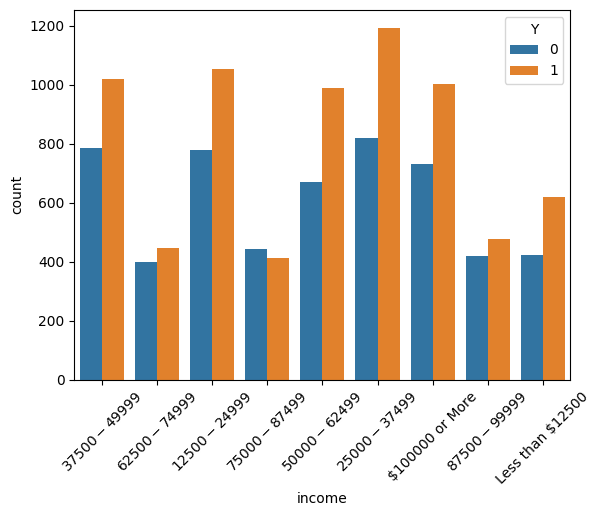

In [ ]:
plt.figure()
sns.countplot(data=data, x='income', hue='Y')
plt.xticks(rotation=45)
plt.show()

In [ ]:
coupons_high_income = data[data['income'] == '$100000 or More']['Y']
coupons_med_income = data[data['income'] == '$50000 - $62499']['Y']

ttest_ind(coupons_high_income, coupons_med_income, equal_var=True)

TtestResult(statistic=-1.0171205682809885, pvalue=0.3091685962998093, df=3393.0)

The difference is not statistically significant as the *p*-value is greater than 0.05. We can conclude that people generally prefer to save money regardless of income.

2. Because bars are often said to be places for singles to meet other singles, there is often a sigma associated with going to a bar as a married person. We try to determine whether married people are less likely to accept coupons for bars.

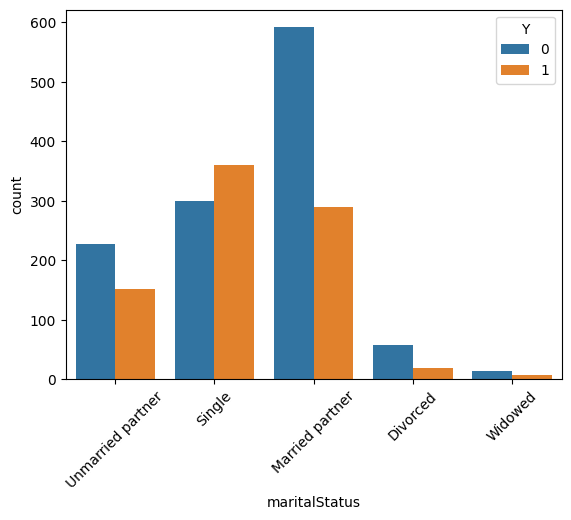

In [ ]:
plt.figure()
sns.countplot(data=df_bar, x='maritalStatus', hue='Y')
plt.xticks(rotation=45)
plt.show()

In [ ]:
coupons_bar_married = data[data['maritalStatus'] == 'Married partner']['Y']
coupons_bar_single = data[data['maritalStatus'] == 'Single']['Y']

ttest_ind(coupons_bar_married, coupons_bar_single, equal_var=True)

TtestResult(statistic=-6.3205426131851965, pvalue=2.7193538943438985e-10, df=9850.0)

Because the *p*-value is well below 0.05, one can conclude that married people are indeed less likely to accept bar coupons.

We also want to find out if married people are more likely to accept coupons for other establishments. One possible question is whether a couple with children be more likely to use coupons for family-style restaurants. []

In [ ]:
df_20_50 = data[data['coupon'] == 'Restaurant(20-50)']

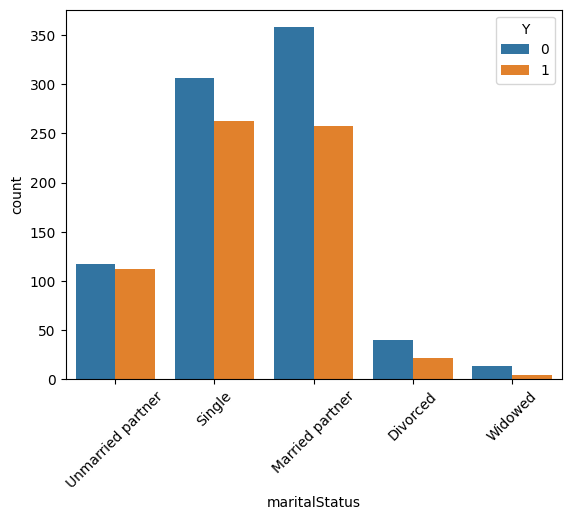

In [ ]:
plt.figure()
sns.countplot(data=df_20_50, x='maritalStatus', hue='Y')
plt.xticks(rotation=45)
plt.show()

Based on this analysis, married people are actually somewhat less likely to accept a coupon for a restaurant in the $20-50 range.

3. For coupons with a short expiration time, there is often a pressure to use them before they expire. We look at whether this affects the acceptance rate.

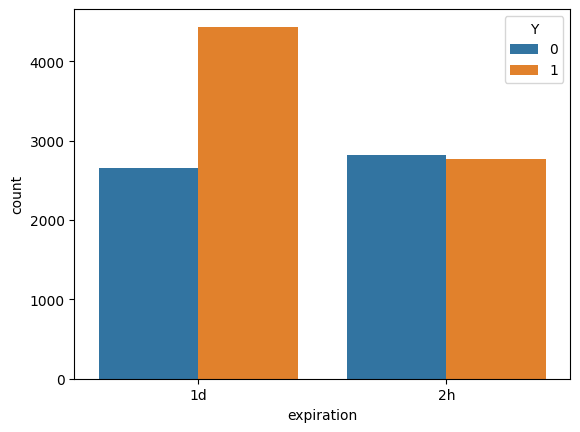

In [ ]:
plt.figure()
sns.countplot(data=data, x='expiration', hue='Y')
plt.show()

In [ ]:
accept_2h = data[data['expiration'] == '2h']['Y']
accept_1d = data[data['expiration'] == '1d']['Y']

ttest_ind(accept_2h, accept_1d, equal_var=True)

TtestResult(statistic=-14.755944495624217, pvalue=7.158221428536576e-49, df=12682.0)

It appears that coupons with an expiration time of one day has a higher acceptance rate than those that expire after just one hour. The *p*-value is very close to zero, which shows an extremely high level of statistical signficance. Because two hours is a very short time, most people will probably feel too time-pressured to take the coupon unless it offers a very good deal (such as a deep discount or a buy-one-get-one-free item).

### Other considerations

* It would be useful to have an additional column to indicate the type of coupon because the benefits conferred are often a deciding factor. For example, a coupon that offers a complimentary meal would be more practical than one that only gives a 5% discount
* Because heading towards a destination and going in the opposite direction are mutually exclusive, `direction_same` and `direction_opp` can be reduced to one variable. Dimensionality reduction can lower the complexity of machine learning models
* Similarly, the three attributes indicating the distance to the destination can also be changed to a single variable; this also has the side benefit of reducing multicollinearity